### Problem Statement
## Perform sentimental analysis: 
### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining

## 1. Multi-page web-scraping
In this, I’m going to show you how to build a multi-page web-scraper in Python.

We will be scraping Amazon product reviews data, but the focus will be on looping through multiple pages.

If you’re looking for a basic introduction to web-scraping in Python, check out the single page Python web-scraper for Amazon product reviews data.

Scraped Amazon product reviews data for some Oneplus Flagship Smartphone
Introduction to using Splash and Docker for web-scraping
Step-by-step implementation of popular web-scraping Python libraries: BeautifulSoup, requests, and Splash.

In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

### A. Looping through multiple pages
One of the easiest methods to scrape multiple pages is to modify the base URL to accept a page variable that increments as needed.

Try for yourself! See how the URL changes as you go through multiple pages.

For Amazon product reviews, the only thing that seems to change is the number indicating which page it is.

In [3]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [7]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

Rating                                              Title  \
0        4.0                Good phone-could have been better !   
1        4.0                             A mildly perfect phone   
2        4.0                        Satisfied and 5G is working   
3        4.0                         Good product within budget   
4        4.0                   Except camera everything is good   
...      ...                                                ...   
4995     5.0                                 Phone overall good   
4996     1.0                Worst service by Amazon And OnePlus   
4997     5.0                                  Very nice phone..   
4998     5.0                                              Brand   
4999     5.0  Well it's first day Nd no complains and goes w...   

                                                 Review  \
0     I've purchased the 6GB version of this phone w...   
1     I will try to keep this review short. This rev...   
2     Very much satisfied. Was bought for calling pu...   
3     I feel it's very good phone within this budget...   
4     Cons:If you are camera lover, don't go with th...   
...                                                 ...   
4995                         Best phone in this budget.   
4996  Very worst service from both Amazon and OnePlu...   
4997                                    Fully satisfied   
4998                   Good product and worth for money   
4999  Wellwhat I like is every thing as the earlier ...   

                                   Review_Date  
0     Reviewed in India 🇮🇳 on 19 December 2022  
1      Reviewed in India 🇮🇳 on 12 January 2023  
2        Reviewed in India 🇮🇳 on 25 April 2023  
3        Reviewed in India 🇮🇳 on 23 April 2023  
4        Reviewed in India 🇮🇳 on 25 April 2023  
...                                        ...  
4995   Reviewed in India 🇮🇳 on 25 October 2022  
4996     Reviewed in India 🇮🇳 on 12 March 2023  
4997   Reviewed in India 🇮🇳 on 26 October 2022  
4998   Reviewed in India 🇮🇳 on 18 October 2022  
4999      Reviewed in India 🇮🇳 on 10 July 2022  

[5000 rows x 4 columns]

In [8]:
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")

## <a id='2'>2. Import Libraries</a>

In [110]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

In [10]:
# load the dataset
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

Rating                                              Title  \
0        4.0                Good phone-could have been better !   
1        4.0                             A mildly perfect phone   
2        4.0                        Satisfied and 5G is working   
3        4.0                         Good product within budget   
4        4.0                   Except camera everything is good   
...      ...                                                ...   
4995     5.0                                 Phone overall good   
4996     1.0                Worst service by Amazon And OnePlus   
4997     5.0                                  Very nice phone..   
4998     5.0                                              Brand   
4999     5.0  Well it's first day Nd no complains and goes w...   

                                                 Review  \
0     I've purchased the 6GB version of this phone w...   
1     I will try to keep this review short. This rev...   
2     Very much satisfied. Was bought for calling pu...   
3     I feel it's very good phone within this budget...   
4     Cons:If you are camera lover, don't go with th...   
...                                                 ...   
4995                         Best phone in this budget.   
4996  Very worst service from both Amazon and OnePlu...   
4997                                    Fully satisfied   
4998                   Good product and worth for money   
4999  Wellwhat I like is every thing as the earlier ...   

                                   Review_Date  
0     Reviewed in India 🇮🇳 on 19 December 2022  
1      Reviewed in India 🇮🇳 on 12 January 2023  
2        Reviewed in India 🇮🇳 on 25 April 2023  
3        Reviewed in India 🇮🇳 on 23 April 2023  
4        Reviewed in India 🇮🇳 on 25 April 2023  
...                                        ...  
4995   Reviewed in India 🇮🇳 on 25 October 2022  
4996     Reviewed in India 🇮🇳 on 12 March 2023  
4997   Reviewed in India 🇮🇳 on 26 October 2022  
4998   Reviewed in India 🇮🇳 on 18 October 2022  
4999      Reviewed in India 🇮🇳 on 10 July 2022  

[5000 rows x 4 columns]

## <a id='3'>3. Data Exploration</a>

In [11]:
reviews.Rating.describe()

count    5000.000000
mean        4.123200
std         0.884635
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

#### Number of Words

In [12]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

Review  word_count
0  I've purchased the 6GB version of this phone w...         299
1  I will try to keep this review short. This rev...         216
2  Very much satisfied. Was bought for calling pu...          25
3  I feel it's very good phone within this budget...          23
4  Cons:If you are camera lover, don't go with th...          15

#### Number of characters

In [13]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

Review  char_count
0  I've purchased the 6GB version of this phone w...      1715.0
1  I will try to keep this review short. This rev...      1189.0
2  Very much satisfied. Was bought for calling pu...       143.0
3  I feel it's very good phone within this budget...       134.0
4  Cons:If you are camera lover, don't go with th...       101.0

#### Average Word Length

In [14]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

Review  avg_word
0  I've purchased the 6GB version of this phone w...  4.755034
1  I will try to keep this review short. This rev...  4.509259
2  Very much satisfied. Was bought for calling pu...  4.760000
3  I feel it's very good phone within this budget...  4.869565
4  Cons:If you are camera lover, don't go with th...  5.800000

#### Number of stopwords

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

Review  stopwords
0  I've purchased the 6GB version of this phone w...        128
1  I will try to keep this review short. This rev...         94
2  Very much satisfied. Was bought for calling pu...         11
3  I feel it's very good phone within this budget...          7
4  Cons:If you are camera lover, don't go with th...          7

#### Number of special characters

In [16]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

Review  hashtags
0  I've purchased the 6GB version of this phone w...         0
1  I will try to keep this review short. This rev...         0
2  Very much satisfied. Was bought for calling pu...         0
3  I feel it's very good phone within this budget...         0
4  Cons:If you are camera lover, don't go with th...         0

#### Number of numerics

In [17]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

Review  numerics
0  I've purchased the 6GB version of this phone w...         2
1  I will try to keep this review short. This rev...         0
2  Very much satisfied. Was bought for calling pu...         0
3  I feel it's very good phone within this budget...         0
4  Cons:If you are camera lover, don't go with th...         0

#### Number of Uppercase words

In [18]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

Review  upper
0  I've purchased the 6GB version of this phone w...      4
1  I will try to keep this review short. This rev...      3
2  Very much satisfied. Was bought for calling pu...      1
3  I feel it's very good phone within this budget...      2
4  Cons:If you are camera lover, don't go with th...      0

In [19]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

####  Spelling correction
We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words.

To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on ‘NLP for beginners using textblob’

In [20]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I've purchased the 6GB version of this phone w...
1    I will try to keep this review short. His revi...
2    Very much satisfied. Was bought for calling pu...
3    I feel it's very good phone within this budget...
4    Sons:Of you are camera lover, don't go with th...
Name: Review, dtype: object

## <a id='4'>4. Feature Engineering</a>

In [21]:
print(reviews['Review_Date'].str.split(' ').str[5],'\n',
      reviews['Review_Date'].str.split(' ').str[6],'\n',
      reviews['Review_Date'].str.split(' ').str[7])

0       19
1       12
2       25
3       23
4       25
        ..
4995    25
4996    12
4997    26
4998    18
4999    10
Name: Review_Date, Length: 5000, dtype: object 
 0       December
1        January
2          April
3          April
4          April
          ...   
4995     October
4996       March
4997     October
4998     October
4999        July
Name: Review_Date, Length: 5000, dtype: object 
 0       2022
1       2023
2       2023
3       2023
4       2023
        ... 
4995    2022
4996    2023
4997    2022
4998    2022
4999    2022
Name: Review_Date, Length: 5000, dtype: object


### Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [22]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[5]
df['Month']=df['Review_Date'].str.split(' ').str[6]
df['Year']=df['Review_Date'].str.split(' ').str[7]
df[['Date','Month','Year']]

Date     Month  Year
0      19  December  2022
1      12   January  2023
2      25     April  2023
3      23     April  2023
4      25     April  2023
...   ...       ...   ...
4995   25   October  2022
4996   12     March  2023
4997   26   October  2022
4998   18   October  2022
4999   10      July  2022

[5000 rows x 3 columns]

In [23]:
df.Month.value_counts()

November     328
October      287
April        256
March        254
December     221
August       194
January      193
September    187
July         179
June         162
February     152
May           97
Name: Month, dtype: int64

### Change 'month' from words to numbers for easier analysis

In [24]:
order={'Month':{'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

Month
0      12.0
1       1.0
2       4.0
3       4.0
4       4.0
...     ...
4995   10.0
4996    3.0
4997   10.0
4998   10.0
4999    7.0

[5000 rows x 1 columns]

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        4998 non-null   object 
 2   Review       4805 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   Date         2510 non-null   object 
 5   Month        2510 non-null   float64
 6   Year         2510 non-null   object 
dtypes: float64(2), object(5)
memory usage: 273.6+ KB


In [26]:
df1.fillna(0,inplace=True)

In [27]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       5000 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   Date         5000 non-null   int64  
 5   Month        5000 non-null   float64
 6   Year         5000 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 273.6+ KB


### Dropping the Original Columns after splitting the data

In [28]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

Rating                                Title  \
0     4.0  Good phone-could have been better !   
1     4.0               A mildly perfect phone   
2     4.0          Satisfied and 5G is working   
3     4.0           Good product within budget   
4     4.0     Except camera everything is good   

                                              Review  Date  Month  Year  
0  I've purchased the 6GB version of this phone w...    19   12.0  2022  
1  I will try to keep this review short. This rev...    12    1.0  2023  
2  Very much satisfied. Was bought for calling pu...    25    4.0  2023  
3  I feel it's very good phone within this budget...    23    4.0  2023  
4  Cons:If you are camera lover, don't go with th...    25    4.0  2023

In [29]:
df

Rating                                              Title  \
0        4.0                Good phone-could have been better !   
1        4.0                             A mildly perfect phone   
2        4.0                        Satisfied and 5G is working   
3        4.0                         Good product within budget   
4        4.0                   Except camera everything is good   
...      ...                                                ...   
4995     5.0                                 Phone overall good   
4996     1.0                Worst service by Amazon And OnePlus   
4997     5.0                                  Very nice phone..   
4998     5.0                                              Brand   
4999     5.0  Well it's first day Nd no complains and goes w...   

                                                 Review  \
0     I've purchased the 6GB version of this phone w...   
1     I will try to keep this review short. This rev...   
2     Very much satisfied. Was bought for calling pu...   
3     I feel it's very good phone within this budget...   
4     Cons:If you are camera lover, don't go with th...   
...                                                 ...   
4995                         Best phone in this budget.   
4996  Very worst service from both Amazon and OnePlu...   
4997                                    Fully satisfied   
4998                   Good product and worth for money   
4999  Wellwhat I like is every thing as the earlier ...   

                                   Review_Date Date     Month  Year  
0     Reviewed in India 🇮🇳 on 19 December 2022   19  December  2022  
1      Reviewed in India 🇮🇳 on 12 January 2023   12   January  2023  
2        Reviewed in India 🇮🇳 on 25 April 2023   25     April  2023  
3        Reviewed in India 🇮🇳 on 23 April 2023   23     April  2023  
4        Reviewed in India 🇮🇳 on 25 April 2023   25     April  2023  
...                                        ...  ...       ...   ...  
4995   Reviewed in India 🇮🇳 on 25 October 2022   25   October  2022  
4996     Reviewed in India 🇮🇳 on 12 March 2023   12     March  2023  
4997   Reviewed in India 🇮🇳 on 26 October 2022   26   October  2022  
4998   Reviewed in India 🇮🇳 on 18 October 2022   18   October  2022  
4999      Reviewed in India 🇮🇳 on 10 July 2022   10      July  2022  

[5000 rows x 7 columns]

## <a id='5'>5. Data Visualization</a>

#### date versus review count

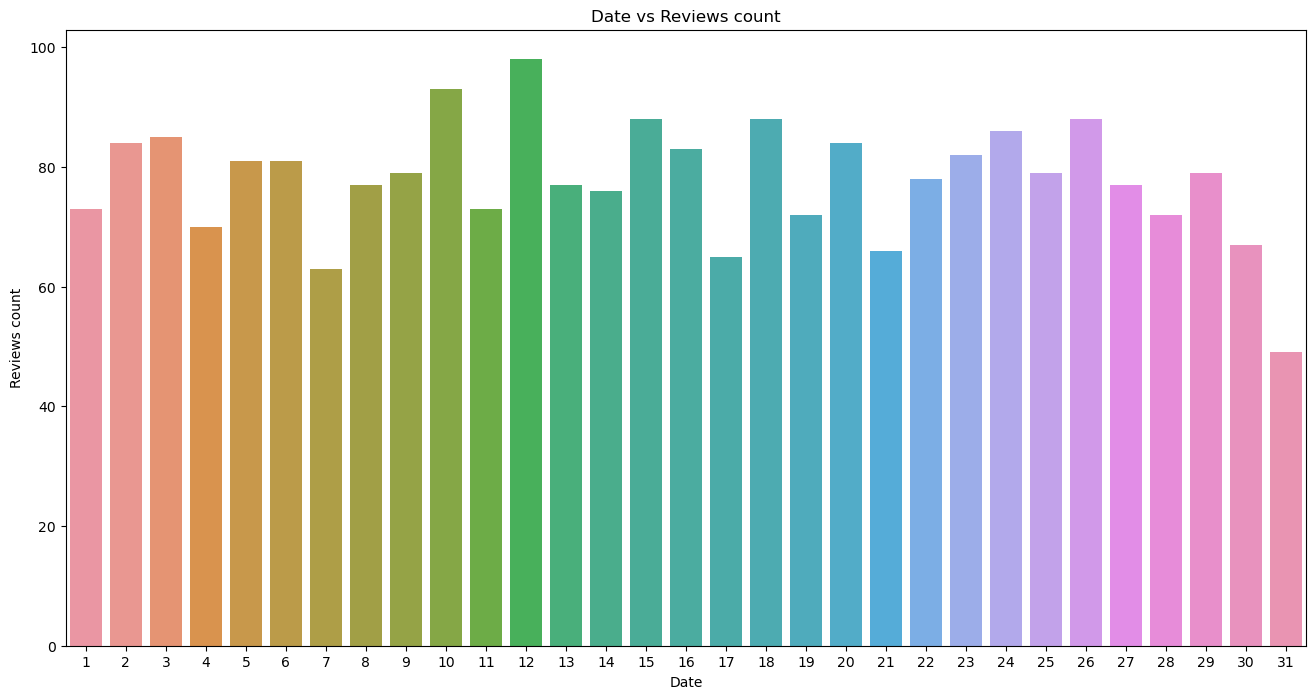

In [30]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()


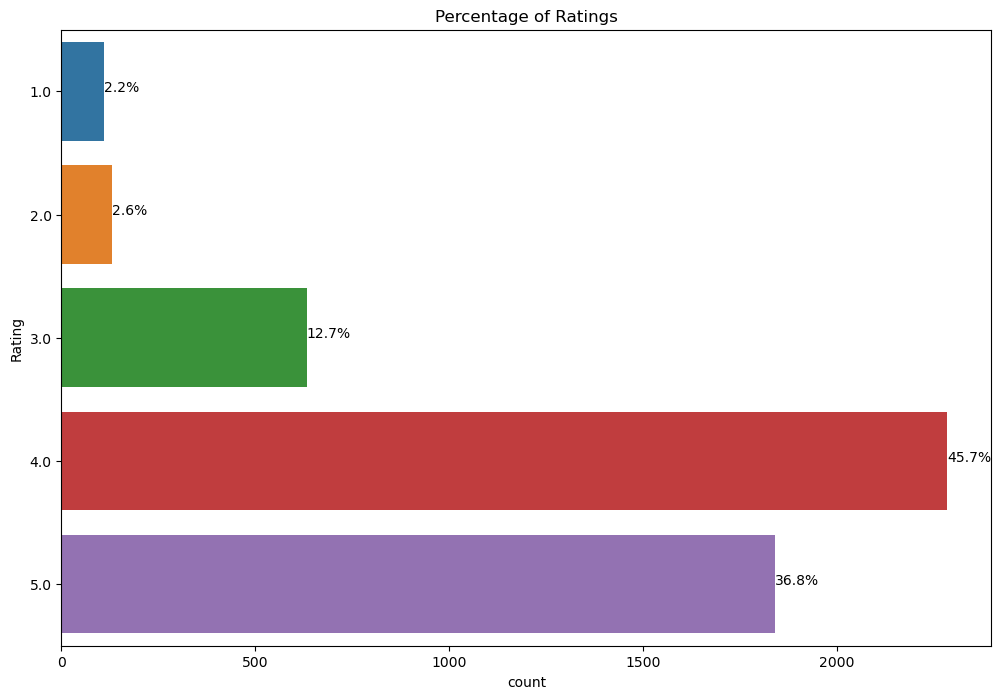

In [31]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

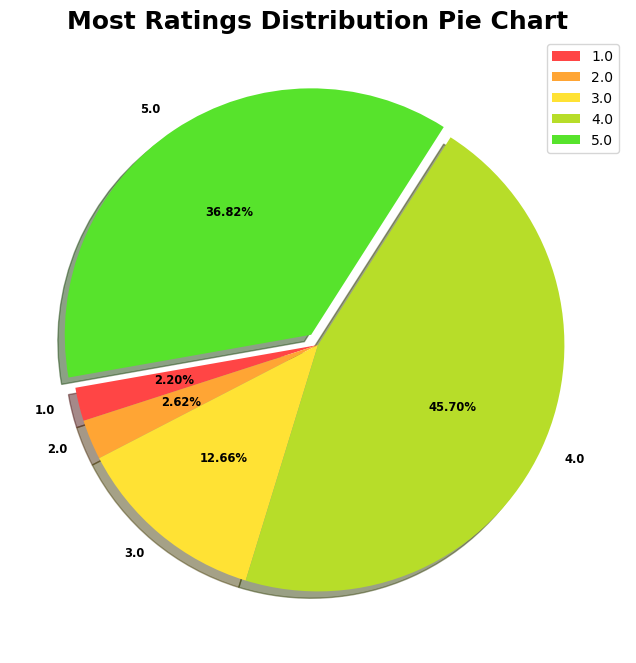

In [32]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

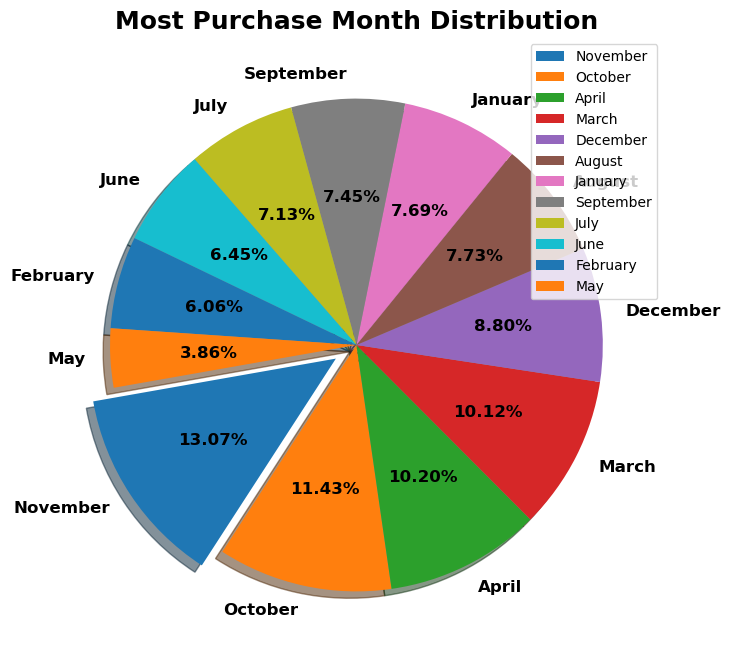

In [33]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

##  <a id='6'>6. BasicText Preprocessing</a>
### <a id='6A'>A. For Sentiment Analysis</a> 
##### keeping the DataFrame intact and each tweets separate from each other

In [34]:
data = df[['Review']]
data

Review
0     I've purchased the 6GB version of this phone w...
1     I will try to keep this review short. This rev...
2     Very much satisfied. Was bought for calling pu...
3     I feel it's very good phone within this budget...
4     Cons:If you are camera lover, don't go with th...
...                                                 ...
4995                         Best phone in this budget.
4996  Very worst service from both Amazon and OnePlu...
4997                                    Fully satisfied
4998                   Good product and worth for money
4999  Wellwhat I like is every thing as the earlier ...

[5000 rows x 1 columns]

In [35]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [36]:
data

Review
0     i've purchased 6gb version phone comes extenda...
1     i try keep review short. this review perspecti...
2     very much satisfied. was bought calling purpos...
3     i feel good phone within budget range. camera,...
4     cons:if camera lover, go thispros:battery good...
...                                                 ...
4995                                 best phone budget.
4996  very worst service amazon oneplusi issue batte...
4997                                    fully satisfied
4998                           good product worth money
4999  wellwhat i like every thing earlier one i usin...

[5000 rows x 1 columns]

In [38]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [39]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  much satisfied bought calling purpose g workin...   
3  feel good phone within budget range camera per...   
4  con camera lover go thispros battery gooddispl...   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Very much satisfied. Was bought for calling pu...  
3  I feel it's very good phone within this budget...  
4  Cons:If you are camera lover, don't go with th...

## <a id='7'>7. Text Pre-processing Techniques</a> 
### <a id='7A'>A. Pre-processing 'Key Words'</a>
#### <a id='7Aa'>a. Removing '@names'</a>

In [40]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [41]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  much satisfied bought calling purpose g workin...   
3  feel good phone within budget range camera per...   
4  con camera lover go thispros battery gooddispl...   
5  loved colour sky blue looked exceptional opene...   
6  good looking camera clarity fabulous battery l...   
7  posting review day used pro battery good using...   
8  mobile signal working mobile battery backup go...   
9                 good product good foe heavy gaming   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Very much satisfied. Was bought for calling pu...  
3  I feel it's very good phone within this budget...  
4  Cons:If you are camera lover, don't go with th...  
5  I loved the colour (sky blue), which looked ex...  
6  Good looking and camera clarity is fabulous ba...  
7  I am posting a review after 7 days of used,Pro...  
8  mobile signals not working mobile battery back...  
9   It is good product but not good foe heavy gaming

#### <a id='7Ab'>b. Removing links (http | https)</a>

In [42]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  much satisfied bought calling purpose g workin...   
3  feel good phone within budget range camera per...   
4  con camera lover go thispros battery gooddispl...   
5  loved colour sky blue looked exceptional opene...   
6  good looking camera clarity fabulous battery l...   
7  posting review day used pro battery good using...   
8  mobile signal working mobile battery backup go...   
9                 good product good foe heavy gaming   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Very much satisfied. Was bought for calling pu...  
3  I feel it's very good phone within this budget...  
4  Cons:If you are camera lover, don't go with th...  
5  I loved the colour (sky blue), which looked ex...  
6  Good looking and camera clarity is fabulous ba...  
7  I am posting a review after 7 days of used,Pro...  
8  mobile signals not working mobile battery back...  
9   It is good product but not good foe heavy gaming

#### <a id='7Ac'>c. Removing Review with empty text</a>

In [43]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  much satisfied bought calling purpose g workin...   
3  feel good phone within budget range camera per...   
4  con camera lover go thispros battery gooddispl...   
5  loved colour sky blue looked exceptional opene...   
6  good looking camera clarity fabulous battery l...   
7  posting review day used pro battery good using...   
8  mobile signal working mobile battery backup go...   
9                 good product good foe heavy gaming   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Very much satisfied. Was bought for calling pu...  
3  I feel it's very good phone within this budget...  
4  Cons:If you are camera lover, don't go with th...  
5  I loved the colour (sky blue), which looked ex...  
6  Good looking and camera clarity is fabulous ba...  
7  I am posting a review after 7 days of used,Pro...  
8  mobile signals not working mobile battery back...  
9   It is good product but not good foe heavy gaming

#### <a id='7Ad'>d. Dropping duplicate rows</a>

In [44]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  much satisfied bought calling purpose g workin...   
3  feel good phone within budget range camera per...   
4  con camera lover go thispros battery gooddispl...   
5  loved colour sky blue looked exceptional opene...   
6  good looking camera clarity fabulous battery l...   
7  posting review day used pro battery good using...   
8  mobile signal working mobile battery backup go...   
9                 good product good foe heavy gaming   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Very much satisfied. Was bought for calling pu...  
3  I feel it's very good phone within this budget...  
4  Cons:If you are camera lover, don't go with th...  
5  I loved the colour (sky blue), which looked ex...  
6  Good looking and camera clarity is fabulous ba...  
7  I am posting a review after 7 days of used,Pro...  
8  mobile signals not working mobile battery back...  
9   It is good product but not good foe heavy gaming

#### <a id='7Ae'>e. Resetting index</a>
It seems that our index needs to be reset, since after removal of some rows, some index values are missing, which may cause problem in future operations.

In [45]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  much satisfied bought calling purpose g workin...   
3  feel good phone within budget range camera per...   
4  con camera lover go thispros battery gooddispl...   
5  loved colour sky blue looked exceptional opene...   
6  good looking camera clarity fabulous battery l...   
7  posting review day used pro battery good using...   
8  mobile signal working mobile battery backup go...   
9                 good product good foe heavy gaming   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Very much satisfied. Was bought for calling pu...  
3  I feel it's very good phone within this budget...  
4  Cons:If you are camera lover, don't go with th...  
5  I loved the colour (sky blue), which looked ex...  
6  Good looking and camera clarity is fabulous ba...  
7  I am posting a review after 7 days of used,Pro...  
8  mobile signals not working mobile battery back...  
9   It is good product but not good foe heavy gaming

#### <a id='7Af'>f. Removing Punctuations, Numbers and Special characters</a>
This step should not be followed if we also want to do sentiment analysis on __key phrases__ as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on __key words__.

In [46]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [47]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  much satisfied bought calling purpose g workin...   
3  feel good phone within budget range camera per...   
4  con camera lover go thispros battery gooddispl...   
5  loved colour sky blue looked exceptional opene...   
6  good looking camera clarity fabulous battery l...   
7  posting review day used pro battery good using...   
8  mobile signal working mobile battery backup go...   
9                 good product good foe heavy gaming   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Very much satisfied. Was bought for calling pu...  
3  I feel it's very good phone within this budget...  
4  Cons:If you are camera lover, don't go with th...  
5  I loved the colour (sky blue), which looked ex...  
6  Good looking and camera clarity is fabulous ba...  
7  I am posting a review after 7 days of used,Pro...  
8  mobile signals not working mobile battery back...  
9   It is good product but not good foe heavy gaming

#### <a id='7Ag'>g. Function to remove emoji</a>

In [48]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [49]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  much satisfied bought calling purpose g workin...   
3  feel good phone within budget range camera per...   
4  con camera lover go thispros battery gooddispl...   
5  loved colour sky blue looked exceptional opene...   
6  good looking camera clarity fabulous battery l...   
7  posting review day used pro battery good using...   
8  mobile signal working mobile battery backup go...   
9                 good product good foe heavy gaming   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Very much satisfied. Was bought for calling pu...  
3  I feel it's very good phone within this budget...  
4  Cons:If you are camera lover, don't go with th...  
5  I loved the colour (sky blue), which looked ex...  
6  Good looking and camera clarity is fabulous ba...  
7  I am posting a review after 7 days of used,Pro...  
8  mobile signals not working mobile battery back...  
9   It is good product but not good foe heavy gaming

In [50]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  much satisfied bought calling purpose g workin...   
3  feel good phone within budget range camera per...   
4  con camera lover go thispros battery gooddispl...   
5  loved colour sky blue looked exceptional opene...   
6  good looking camera clarity fabulous battery l...   
7  posting review day used pro battery good using...   
8  mobile signal working mobile battery backup go...   
9                 good product good foe heavy gaming   

                                   Uncleaned_Reviews  \
0  I've purchased the 6GB version of this phone w...   
1  I will try to keep this review short. This rev...   
2  Very much satisfied. Was bought for calling pu...   
3  I feel it's very good phone within this budget...   
4  Cons:If you are camera lover, don't go with th...   
5  I loved the colour (sky blue), which looked ex...   
6  Good looking and camera clarity is fabulous ba...   
7  I am posting a review after 7 days of used,Pro...   
8  mobile signals not working mobile battery back...   
9   It is good product but not good foe heavy gaming   

                                    tokenized_tweets  
0  [purchased, gb, version, phone, come, extendab...  
1  [try, keep, review, short, review, perspective...  
2  [much, satisfied, bought, calling, purpose, g,...  
3  [feel, good, phone, within, budget, range, cam...  
4  [con, camera, lover, go, thispros, battery, go...  
5  [loved, colour, sky, blue, looked, exceptional...  
6  [good, looking, camera, clarity, fabulous, bat...  
7  [posting, review, day, used, pro, battery, goo...  
8  [mobile, signal, working, mobile, battery, bac...  
9          [good, product, good, foe, heavy, gaming]

In [51]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

#### <a id='7Ah'>h. Removing Stop words</a>
With the same reason we mentioned above, we won't perform this on 'Clean-Review' column, because it needs to be used for __key_phrases__ sentiment analysis.

In [52]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [53]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [54]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  much satisfied bought calling purpose g workin...   
3  feel good phone within budget range camera per...   
4  con camera lover go thispros battery gooddispl...   
5  loved colour sky blue looked exceptional opene...   
6  good looking camera clarity fabulous battery l...   
7  posting review day used pro battery good using...   
8  mobile signal working mobile battery backup go...   
9                 good product good foe heavy gaming   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Very much satisfied. Was bought for calling pu...  
3  I feel it's very good phone within this budget...  
4  Cons:If you are camera lover, don't go with th...  
5  I loved the colour (sky blue), which looked ex...  
6  Good looking and camera clarity is fabulous ba...  
7  I am posting a review after 7 days of used,Pro...  
8  mobile signals not working mobile battery back...  
9   It is good product but not good foe heavy gaming

#### <a id='7Ai'>i. Tokenize *'Clean_Reviews'*</a>  

In [55]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['try', 'keep', 'review', 'short', 'review', 'perspective', 'average', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'without', 'complaining', 'much', 'always', 'better', 'device', 'price', 'use', 'tool', 'nothing', 'much', 'pro', 'camera', 'pretty', 'good', 'con', 'software', 'sweet', 'little', 'feature', 'one', 'plus', 'make', 'sweet', 'negative', 'speed', 'power', 'run', 'apps', 'people', 'use', 'generally', 'without', 'issue', 'build', 'quality', 'good', 'well', 'given', 'going', 'use', 'sort', 'case', 'con', 'con', 'see', 'battery', 'need', 'charge', 'twice', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'youtube', 'instagram', 'facebook', 'medium', 'apps', 'like', 'hour', 'two', 'mid', 'brightness', 'maximum', 'achievable', 'screen', 'time', 'around', 'hour', 'given', 'high', 'speed', 'charger', 'battery', 'really', 'issue', 'tweaking', 'around', 'setting', 'delete', 'preinstalled', 'apps', 'stop', 'unnecessary', 'apps', 'backgro

In [56]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [purchased, gb, version, phone, come, extendab...
1    [try, keep, review, short, review, perspective...
2    [much, satisfied, bought, calling, purpose, g,...
3    [feel, good, phone, within, budget, range, cam...
4    [con, camera, lover, go, thispros, battery, go...
5    [loved, colour, sky, blue, looked, exceptional...
6    [good, looking, camera, clarity, fabulous, bat...
7    [posting, review, day, used, pro, battery, goo...
8    [mobile, signal, working, mobile, battery, bac...
9            [good, product, good, foe, heavy, gaming]
Name: Clean_Reviews, dtype: object

#### <a id='7Ai'>j. Converting words to Stemmer</a>

In [57]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [58]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

stemmed
0     purchas gb version phone come extend gb ram vi...
1     tri keep review short review perspect averag u...
2     much satisfi bought call purpos g work batteri...
3     feel good phone within budget rang camera perf...
4     con camera lover go thispro batteri gooddispla...
...                                                 ...
4947                                  best phone budget
4948  worst servic amazon oneplusi issu batteri drai...
4949                                      fulli satisfi
4950                           good product worth money
4951  wellwhat like everi thing earlier one use sams...

[4952 rows x 1 columns]

#### <a id='7Ak'>k. Converting words to Lemma</a>

In [109]:
word_lemmatizer = WordNetLemmatizer()
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

stemmed
0     purchased gb version phone come extendable gb ...
1     try keep review short review perspective avera...
2     much satisfied bought calling purpose g workin...
3     feel good phone within budget range camera per...
4     con camera lover go thispros battery gooddispl...
...                                                 ...
4947                                  best phone budget
4948  worst service amazon oneplusi issue battery dr...
4949                                    fully satisfied
4950                           good product worth money
4951  wellwhat like every thing earlier one using sa...

[4952 rows x 1 columns]

## <a id='8'>8. Basic Feature Extaction</a>
### <a id='8Aa'>A. **Applying bag of Words without N grams**</a>

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [61]:
#print(cv.vocabulary_)

In [62]:
print(cv.get_feature_names()[109:200])

['aggregation', 'agin', 'agni', 'ago', 'agree', 'ah', 'ahead', 'aheadof', 'ai', 'aince', 'airtel', 'ak', 'aknh', 'al', 'alart', 'albeit', 'alert', 'alexa', 'alignment', 'alike', 'allow', 'allram', 'allready', 'allright', 'allround', 'allrounder', 'almost', 'alone', 'along', 'alot', 'already', 'alril', 'also', 'alsothe', 'alspath', 'alternate', 'alternative', 'although', 'altogether', 'always', 'ama', 'amaging', 'amaze', 'amazed', 'amazing', 'amazingcamera', 'amazingly', 'amazingthis', 'amazon', 'amazone', 'amazonit', 'ambient', 'amezing', 'amezingcharging', 'amezon', 'amh', 'amloiedover', 'ammolated', 'amo', 'amoled', 'amolid', 'among', 'amount', 'amountand', 'ample', 'andar', 'andbcamera', 'andif', 'andorid', 'android', 'androidbattery', 'androidfast', 'andthe', 'angel', 'angle', 'angry', 'animation', 'announce', 'announcement', 'announces', 'annoying', 'another', 'answer', 'answering', 'antutu', 'anurag', 'anybody', 'anymore', 'anyone', 'anything', 'anytime']


In [63]:
print(cv.get_feature_names()[:100])

['aa', 'aacha', 'aaj', 'aand', 'aanouncementcamera', 'aap', 'aapko', 'aaplog', 'aati', 'aaya', 'aayega', 'ab', 'abhi', 'able', 'abnd', 'abnormal', 'absence', 'absent', 'absolutely', 'absolutelybut', 'absolutelynot', 'absurd', 'abt', 'acalso', 'accept', 'acceptable', 'acceptablecamera', 'accepted', 'accepts', 'access', 'accessible', 'accessing', 'accessory', 'accha', 'accidental', 'accidently', 'accommodated', 'accomodate', 'accomplished', 'according', 'accordingbrand', 'account', 'accurate', 'acha', 'achcha', 'achchha', 'achchhi', 'ache', 'achha', 'achhe', 'achhi', 'achi', 'achievable', 'achieve', 'achieved', 'across', 'act', 'action', 'activate', 'activated', 'activates', 'activity', 'actual', 'actually', 'ad', 'adamant', 'adapter', 'adaption', 'adaptive', 'add', 'added', 'addict', 'addicted', 'adding', 'addition', 'additional', 'address', 'adequate', 'adjust', 'adjusted', 'adjusting', 'adjustment', 'admit', 'adopted', 'adopter', 'adoptor', 'advance', 'advanced', 'advantage', 'adventu

In [64]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### <a id='8Ba'>B. **CountVectorizer with N-grams (Bigrams & Trigrams)**</a>

In [65]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4952 [00:00<?, ?it/s]

In [66]:
corpus[3]

'feel good phone within budget rang camera perform special one thing improv display'

In [67]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [68]:
X.shape

(4952, 5000)

In [69]:
cv.get_feature_names()[:20]

['aacha',
 'aap',
 'ab',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'account',
 'accur',
 'acha',
 'acha phone',
 'achha',
 'achi',
 'achiev',
 'activ',
 'actual']

In [70]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [71]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

aacha  aap  ab  abl  absolut  accept  access  accessori  accha  accord  \
0         0    0   0    0        0       0       0          0      0       0   
1         0    0   0    0        0       0       0          0      0       0   
2         0    0   0    0        0       0       0          0      0       0   
3         0    0   0    0        0       0       0          0      0       0   
4         0    0   0    0        0       0       0          0      0       0   
...     ...  ...  ..  ...      ...     ...     ...        ...    ...     ...   
4947      0    0   0    0        0       0       0          0      0       0   
4948      0    0   0    0        0       0       0          0      0       0   
4949      0    0   0    0        0       0       0          0      0       0   
4950      0    0   0    0        0       0       0          0      0       0   
4951      0    0   0    0        0       0       0          0      0       0   

      ...  year secur  year secur updat  yellow  yesterday  yet  youtub  \
0     ...           0                 0       0          0    0       0   
1     ...           0                 0       0          0    0       1   
2     ...           0                 0       0          0    0       0   
3     ...           0                 0       0          0    0       0   
4     ...           0                 0       0          0    0       0   
...   ...         ...               ...     ...        ...  ...     ...   
4947  ...           0                 0       0          0    0       0   
4948  ...           0                 0       0          0    0       0   
4949  ...           0                 0       0          0    0       0   
4950  ...           0                 0       0          0    0       0   
4951  ...           0                 0       0          0    0       0   

      youtub video  yr  zero  zoom  
0                0   0     0     0  
1                0   0     0     0  
2                0   0     0     0  
3                0   0     0     0  
4                0   0     0     0  
...            ...  ..   ...   ...  
4947             0   0     0     0  
4948             0   0     0     0  
4949             0   0     0     0  
4950             0   0     0     0  
4951             0   0     0     0  

[4952 rows x 5000 columns]

### <a id='8Ca'>C. **TF-IDF Vectorizer**</a>

In [72]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4952 [00:00<?, ?it/s]

In [73]:
corpus[4]

'con camera lover go thispro batteri gooddisplay nicedur good'

In [74]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [75]:
X.shape

(4952, 5000)

In [76]:
tfidf_v.get_feature_names()[:20]

['aacha',
 'aap',
 'ab',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'account',
 'accur',
 'acha',
 'acha phone',
 'achha',
 'achi',
 'achiev',
 'activ',
 'actual']

In [77]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [78]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

aacha  aap   ab  abl  absolut  accept  access  accessori  accha  accord  \
0       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
1       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
2       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
3       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
...     ...  ...  ...  ...      ...     ...     ...        ...    ...     ...   
4947    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4948    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4949    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4950    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4951    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   

      ...  year secur  year secur updat  yellow  yesterday  yet    youtub  \
0     ...         0.0               0.0     0.0        0.0  0.0  0.000000   
1     ...         0.0               0.0     0.0        0.0  0.0  0.077582   
2     ...         0.0               0.0     0.0        0.0  0.0  0.000000   
3     ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4     ...         0.0               0.0     0.0        0.0  0.0  0.000000   
...   ...         ...               ...     ...        ...  ...       ...   
4947  ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4948  ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4949  ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4950  ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4951  ...         0.0               0.0     0.0        0.0  0.0  0.000000   

      youtub video   yr  zero  zoom  
0              0.0  0.0   0.0   0.0  
1              0.0  0.0   0.0   0.0  
2              0.0  0.0   0.0   0.0  
3              0.0  0.0   0.0   0.0  
4              0.0  0.0   0.0   0.0  
...            ...  ...   ...   ...  
4947           0.0  0.0   0.0   0.0  
4948           0.0  0.0   0.0   0.0  
4949           0.0  0.0   0.0   0.0  
4950           0.0  0.0   0.0   0.0  
4951           0.0  0.0   0.0   0.0  

[4952 rows x 5000 columns]

### <a id='8Da'>D. Named Entity Recognition (NER)</a>

In [79]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'purchased gb version phone come extendable gb ram virtual memory capability good phone least expensive category offering one plus small evident point get noticed first thing confusing placement power button hence finger sensor daily handling mobile phone feel bit annoying finger locking un locking phone try handle place pocket although big problem still something think second point lag noticeable bit hoping might go away update improvement third point speaker volume speaker good near maximum level e volume seem creep steadily rather louds top volume limit fourth point final one camera shoot color realistic photo taken day light especially skin tone tend coloured led flash average could better good awesome part phone practicality daily user one plus strong brand part pricing offered battery life good charging capability also impressive someone like moved android phone build phone apt survive normal fall mishap happening phone feel solid hand stock android clean nothing complain overall

In [80]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [81]:
for token in doc_block[:50]:
    print(token,token.pos_)  

purchased VERB
gb PROPN
version NOUN
phone NOUN
come VERB
extendable ADJ
gb NOUN
ram VERB
virtual ADJ
memory NOUN
capability NOUN
good ADJ
phone NOUN
least ADJ
expensive ADJ
category NOUN
offering VERB
one NUM
plus CCONJ
small ADJ
evident ADJ
point NOUN
get AUX
noticed VERB
first ADJ
thing NOUN
confusing VERB
placement NOUN
power NOUN
button NOUN
hence ADV
finger PROPN
sensor NOUN
daily ADV
handling VERB
mobile ADJ
phone NOUN
feel NOUN
bit NOUN
annoying ADJ
finger NOUN
locking VERB
un PROPN
locking VERB
phone NOUN
try NOUN
handle VERB
place NOUN
pocket NOUN
although SCONJ


In [82]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['keep', 'review', 'review', 'perspective', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'complaining', 'device', 'price', 'use', 'tool', 'camera', 'con', 'software', 'feature', 'make', 'speed', 'power', 'run', 'apps', 'people', 'use', 'issue', 'build', 'quality', 'given', 'going', 'use', 'sort', 'case', 'see', 'battery', 'need', 'charge', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'facebook', 'medium', 'apps', 'hour', 'brightness', 'screen', 'time', 'hour', 'given', 'speed', 'charger', 'battery', 'issue', 'tweaking', 'setting', 'delete', 'preinstalled', 'apps', 'stop', 'apps', 'background', 'achieve', 'hr', 'screen', 'time', 'peace', 'bought', 'calling', 'purpose', 'g', 'working', 'battery', 'drain', 'mode', 'loving', 'feel', 'phone', 'budget', 'range', 'camera', 'performance', 'thing', 'improved', 'display', 'camera', 'go', 'battery', 'gooddisplay', 'nicedurability', 'loved', 'colour', 'sky', 'blue']


In [83]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0        phone   2316
1       camera   1534
2      battery   1013
3      quality    926
4        price    516
5      product    514
6          day    352
7  performance    330
8         life    323
9        issue    313

<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

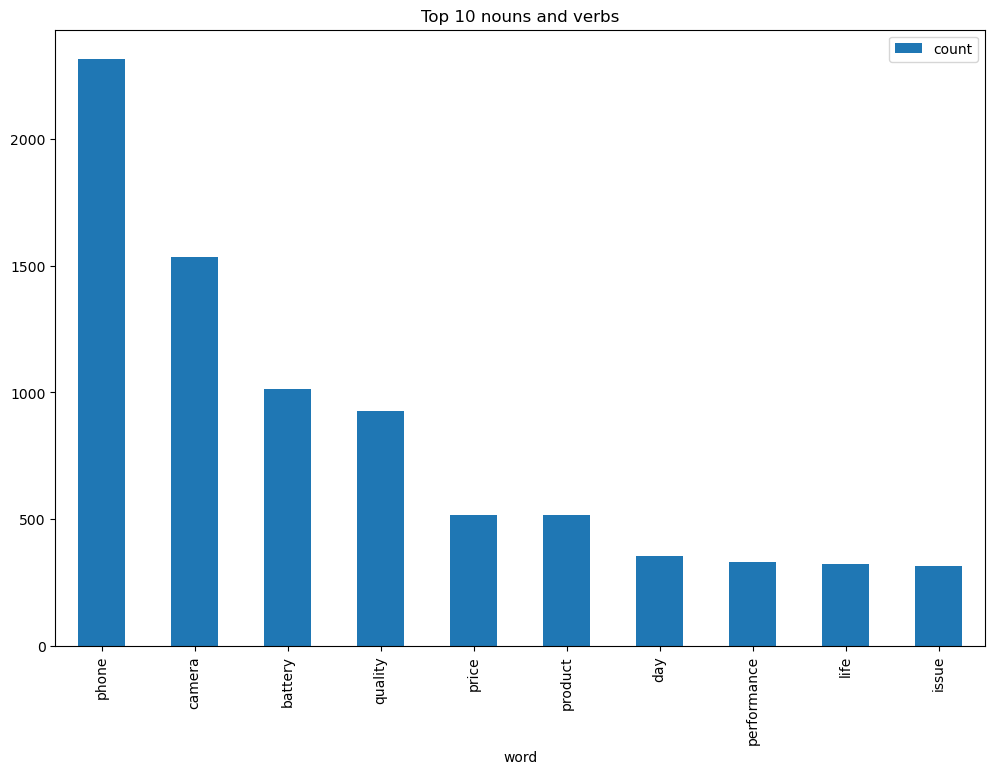

In [84]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

## <a id='9'>9. Feature Extraction</a>

We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

1. __Bag of words (Simple vectorization)__
2. __TF-IDF (Term Frequency - Inverse Document Frequency)__

We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.


### <a id='9Aa'>A. Feature Extraction for 'Key Words'</a>

In [85]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

## <a id='10'>10. Fetch sentiments</a>
To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways: <br/>
    __a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)<br/>__
    __b. Using TextBlob<br/>__

In [86]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

### <a id='10Aa'>a. Using NLTK's SentimentIntensityAnalyzer</a>

In [87]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

Clean_Reviews
pos           4533
neg            419

In [88]:
dataframe.Clean_Reviews[8]

'mobile signal working mobile battery backup good time hanged time hanged yesterday visited oneplus store good service'

In [89]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.7003}

In [90]:
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.7003}

In [91]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

Review  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  much satisfied bought calling purpose g workin...   
3  feel good phone within budget range camera per...   
4  con camera lover go thispros battery gooddispl...   

                                              scores  
0  {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...  
1  {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...  
2  {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'comp...  
3  {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...  
4  {'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'comp...

In [92]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

Review  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  much satisfied bought calling purpose g workin...   
3  feel good phone within budget range camera per...   
4  con camera lover go thispros battery gooddispl...   

                                              scores  compound  
0  {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...    0.9876  
1  {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...    0.9776  
2  {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'comp...    0.7717  
3  {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...    0.7184  
4  {'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'comp...    0.7717

In [93]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

Review  \
0     purchased gb version phone come extendable gb ...   
1     try keep review short review perspective avera...   
2     much satisfied bought calling purpose g workin...   
3     feel good phone within budget range camera per...   
4     con camera lover go thispros battery gooddispl...   
...                                                 ...   
4947                                  best phone budget   
4948  worst service amazon oneplusi issue battery dr...   
4949                                    fully satisfied   
4950                           good product worth money   
4951  wellwhat like every thing earlier one using sa...   

                                                 scores  compound sentiment  
0     {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...    0.9876  Positive  
1     {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...    0.9776  Positive  
2     {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'comp...    0.7717  Positive  
3     {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...    0.7184  Positive  
4     {'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'comp...    0.7717  Positive  
...                                                 ...       ...       ...  
4947  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...    0.6369  Positive  
4948  {'neg': 0.163, 'neu': 0.598, 'pos': 0.239, 'co...   -0.0258   Neutral  
4949  {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp...    0.4754  Positive  
4950  {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...    0.5859  Positive  
4951  {'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compou...    0.7650  Positive  

[4952 rows x 4 columns]

In [94]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

G:\ExcelR\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [95]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

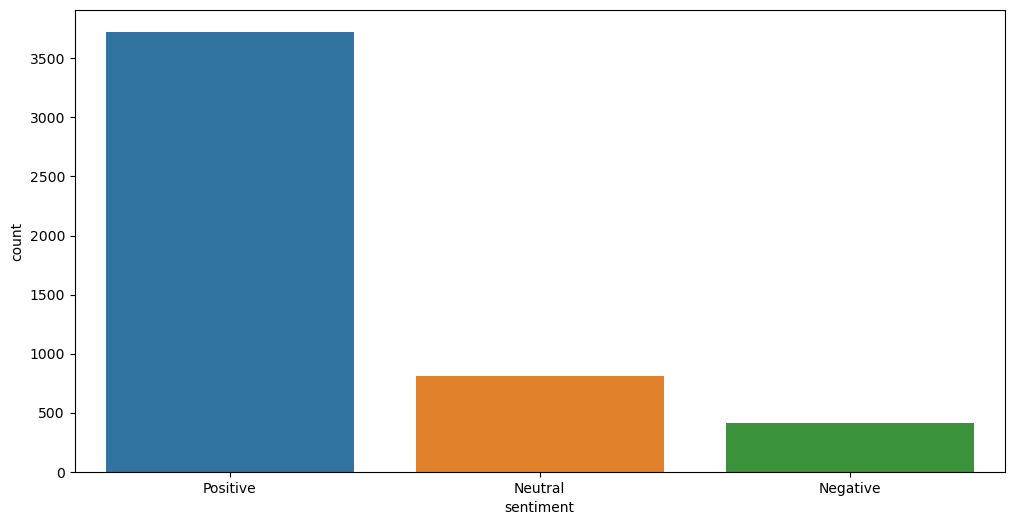

In [96]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<AxesSubplot:xlabel='compound', ylabel='Density'>

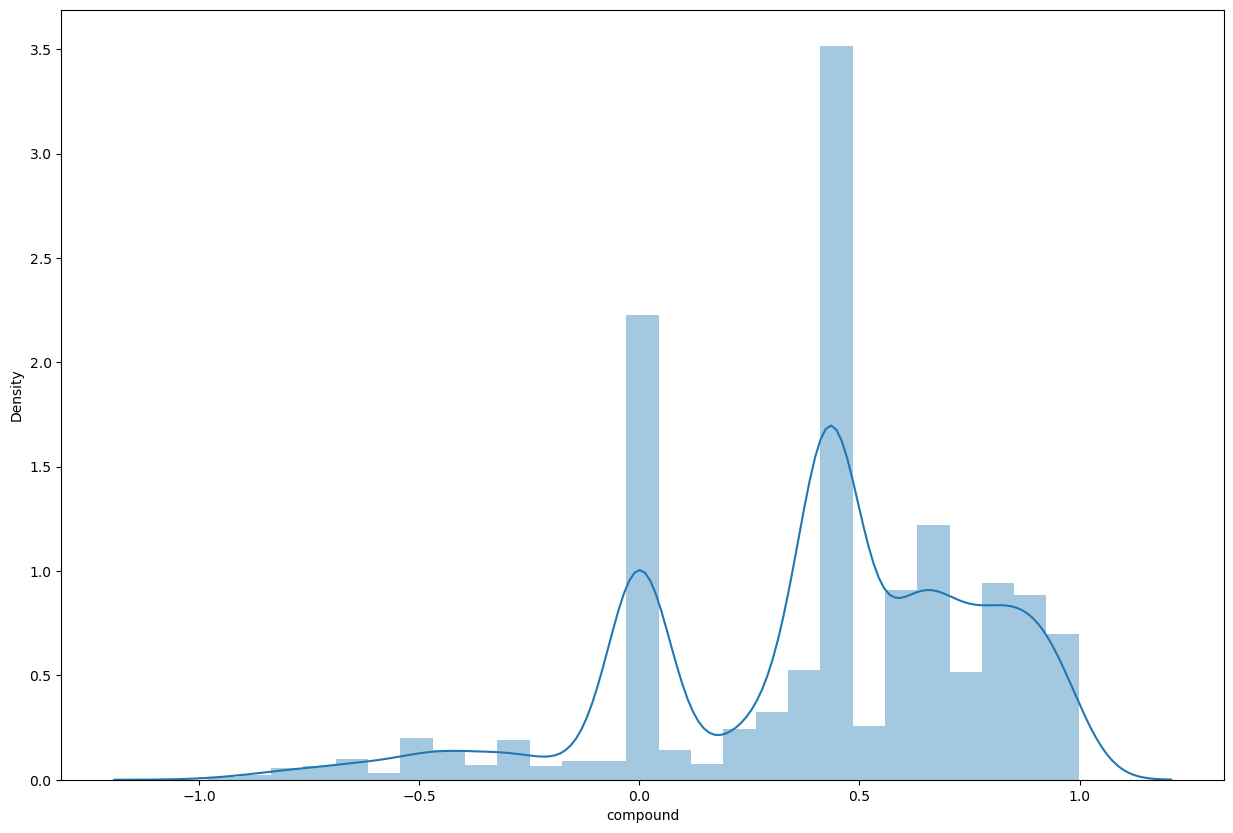

In [97]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [98]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

Review  word_count
0  purchased gb version phone come extendable gb ...         165
1  try keep review short review perspective avera...         112
2  much satisfied bought calling purpose g workin...          12
3  feel good phone within budget range camera per...          13
4  con camera lover go thispros battery gooddispl...           9

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

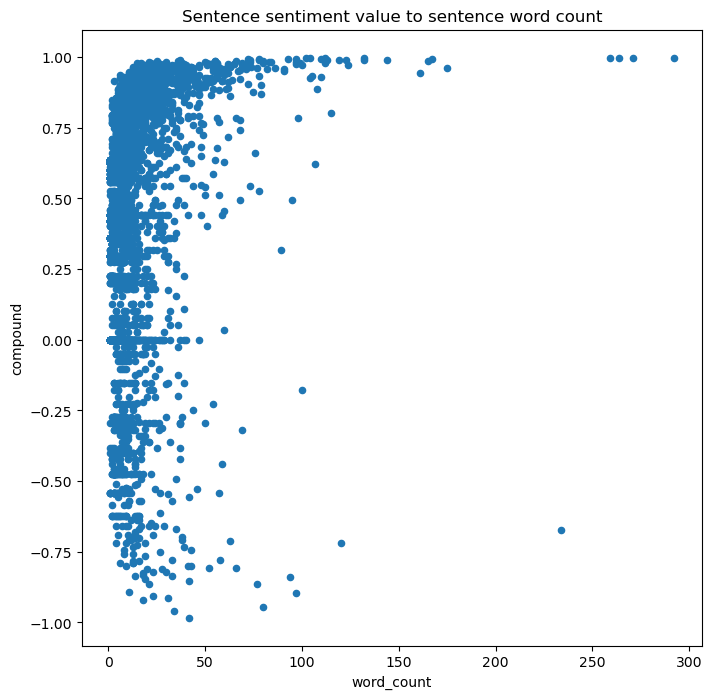

In [99]:
# Correlation analysis
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')

### <a id='10Ab'>b. Using TextBlob</a>

In [100]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

Clean_Reviews
pos           4609
neg            343

In [101]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  much satisfied bought calling purpose g workin...   
3  feel good phone within budget range camera per...   
4  con camera lover go thispros battery gooddispl...   

                                   Uncleaned_Reviews  Subjectivity  Polarity  
0  I've purchased the 6GB version of this phone w...      0.486111  0.180556  
1  I will try to keep this review short. This rev...      0.498519  0.169769  
2  Very much satisfied. Was bought for calling pu...      0.830000  0.420000  
3  I feel it's very good phone within this budget...      0.585714  0.528571  
4  Cons:If you are camera lover, don't go with th...      0.600000  0.700000

Text(0, 0.5, 'Subjectivity')

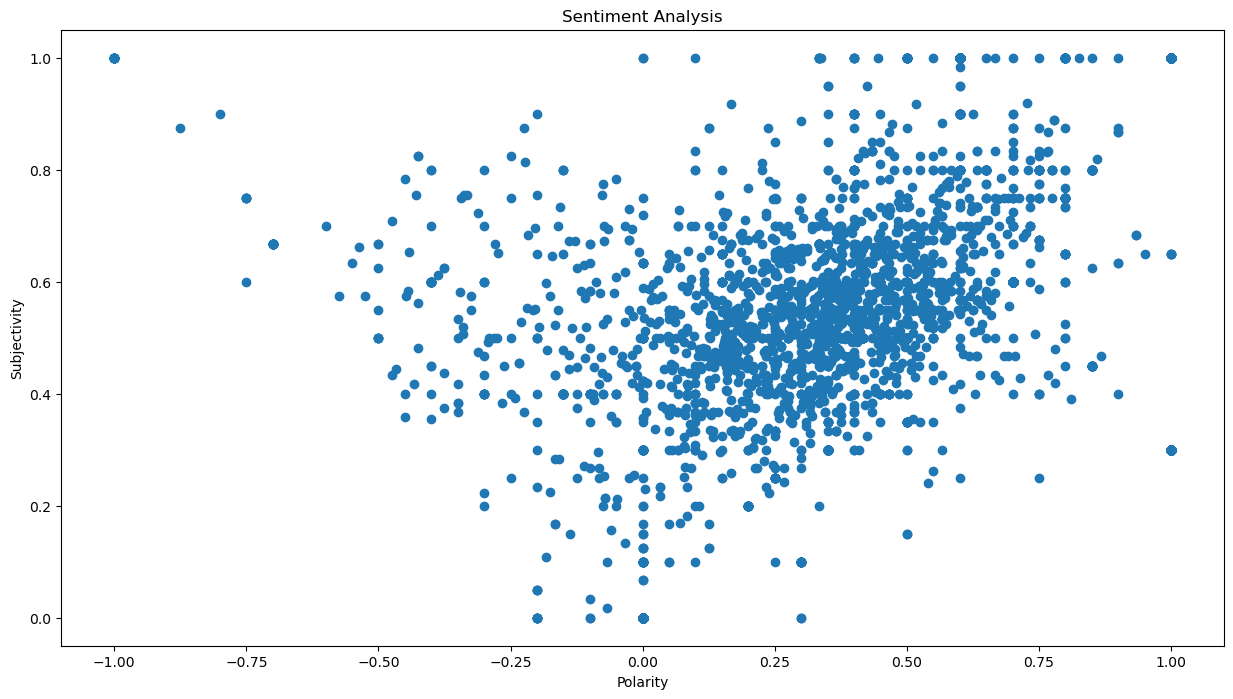

In [102]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [103]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [104]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  much satisfied bought calling purpose g workin...   
3  feel good phone within budget range camera per...   
4  con camera lover go thispros battery gooddispl...   

                                   Uncleaned_Reviews  Subjectivity  Polarity  \
0  I've purchased the 6GB version of this phone w...      0.486111  0.180556   
1  I will try to keep this review short. This rev...      0.498519  0.169769   
2  Very much satisfied. Was bought for calling pu...      0.830000  0.420000   
3  I feel it's very good phone within this budget...      0.585714  0.528571   
4  Cons:If you are camera lover, don't go with th...      0.600000  0.700000   

  sentiment  
0       pos  
1       pos  
2       pos  
3       pos  
4       pos

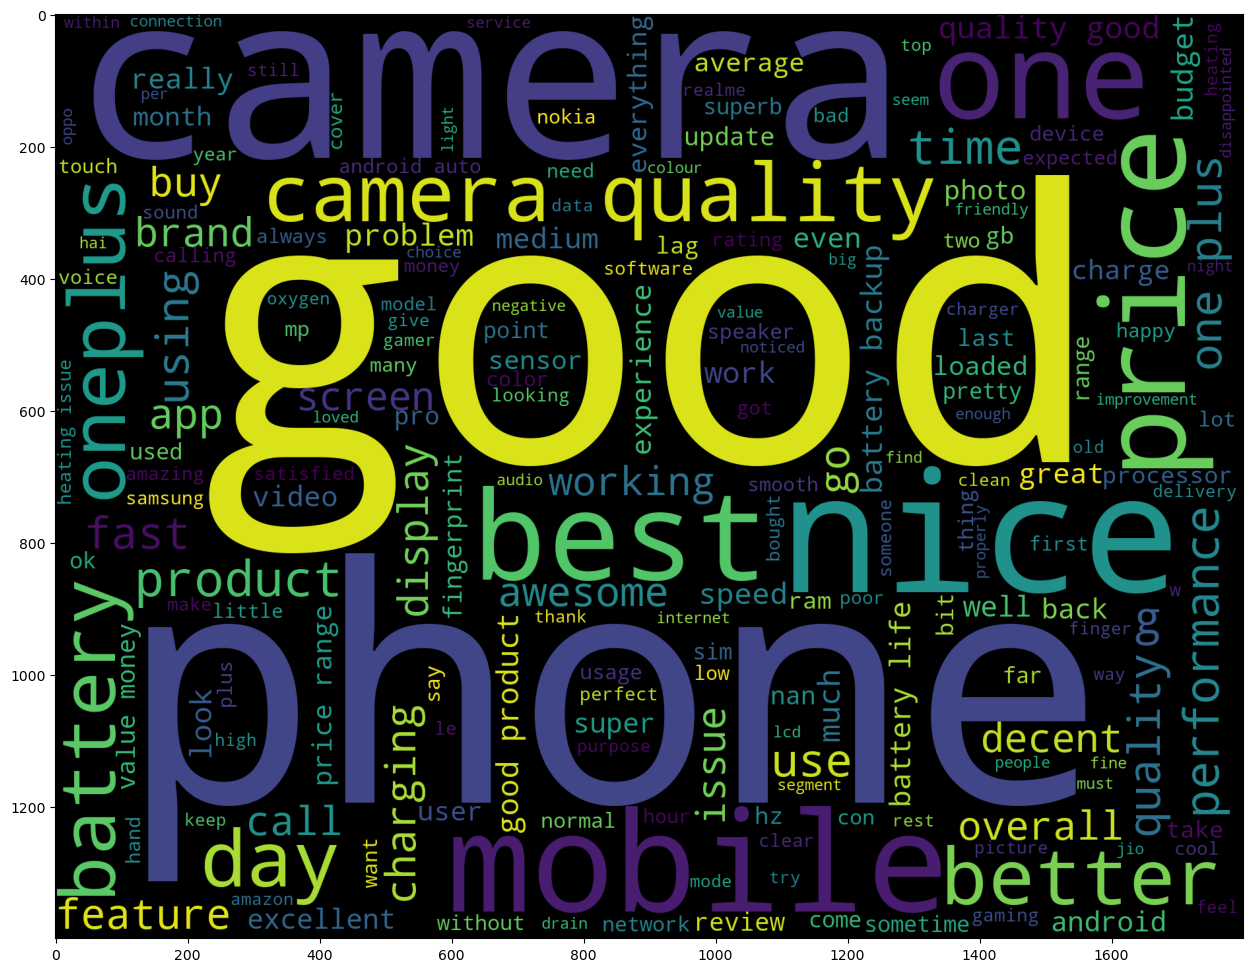

In [105]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

### <a id='11A'>A. Most common words in positive Review</a>
Answer can be best found using WordCloud

In [106]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

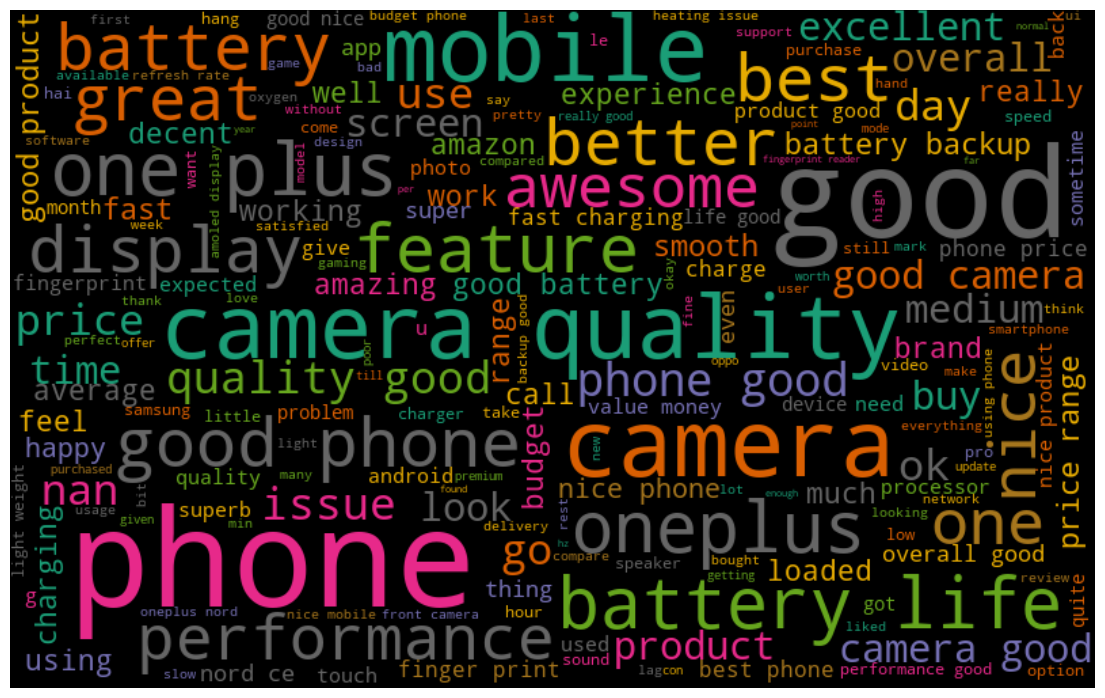

In [107]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

### <a id='11B'>B. Most common words in negative Review</a>

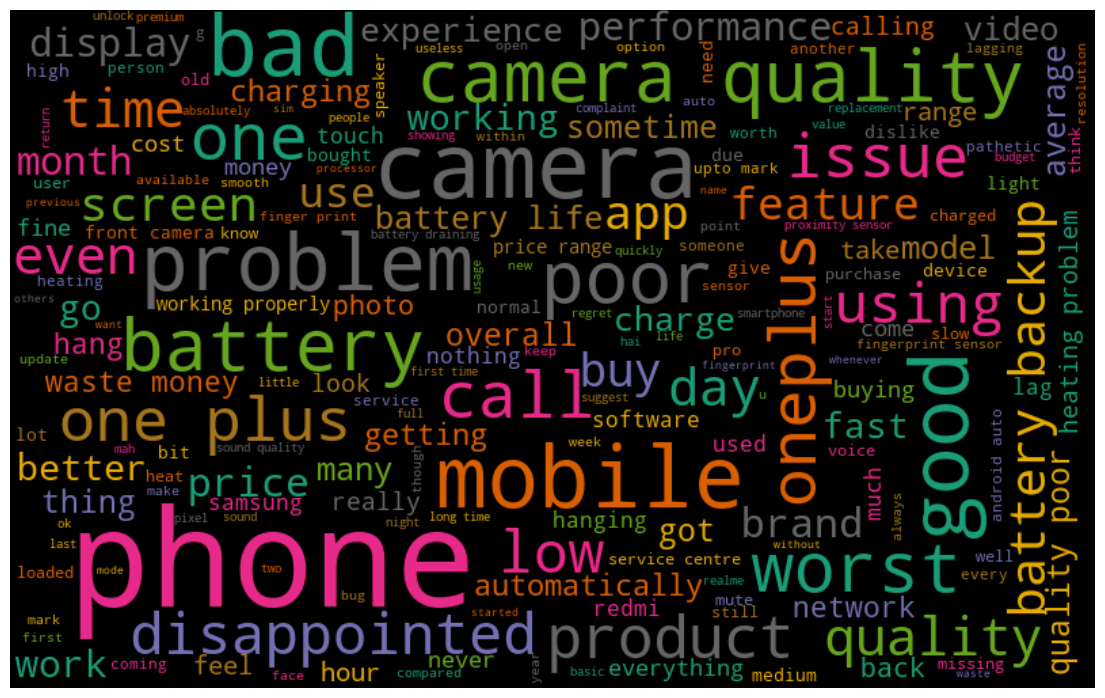

In [108]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)